In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv(r"kaggle/mitbih_train.csv", header = None)
test_data = pd.read_csv(r"kaggle/mitbih_test.csv", header = None)

In [4]:
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_data.isnull().sum()
train_data.iloc[:, 187].unique()

array([0., 1., 2., 3., 4.])

In [6]:
train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [7]:

train_data[187] = train_data[187].astype('int')
test_data[187] = test_data[187].astype('int') 


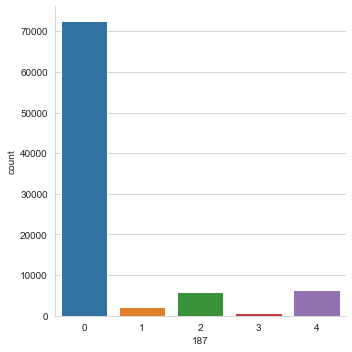

In [17]:
sns.catplot(x = 187, kind = 'count', data = train_data)

In [14]:
train_data[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

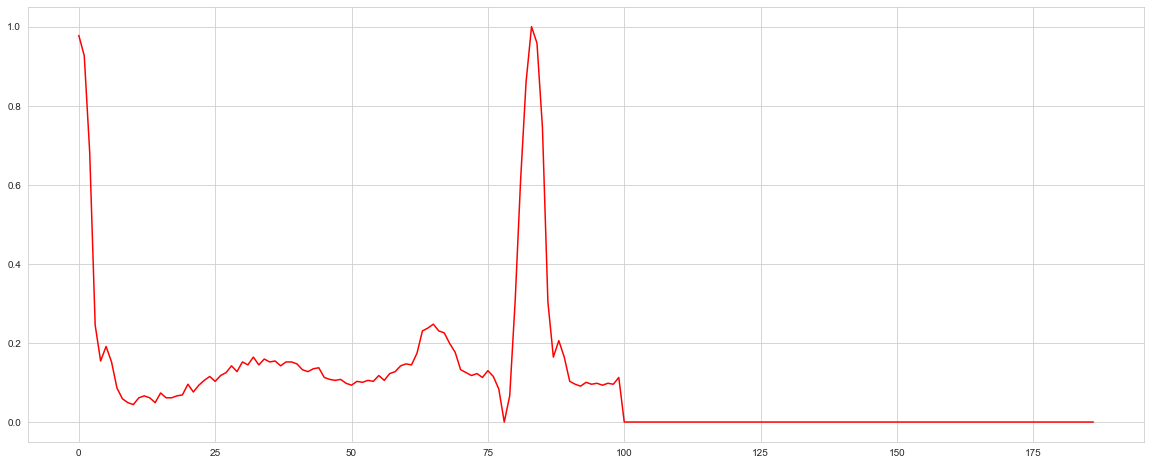

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red')
plt.show()

In [10]:
set_0 = train_data[train_data[187] == 0]
set_1 = train_data[train_data[187] == 1]
set_2 = train_data[train_data[187] == 2]
set_3 = train_data[train_data[187] == 3]
set_4 = train_data[train_data[187] == 4]

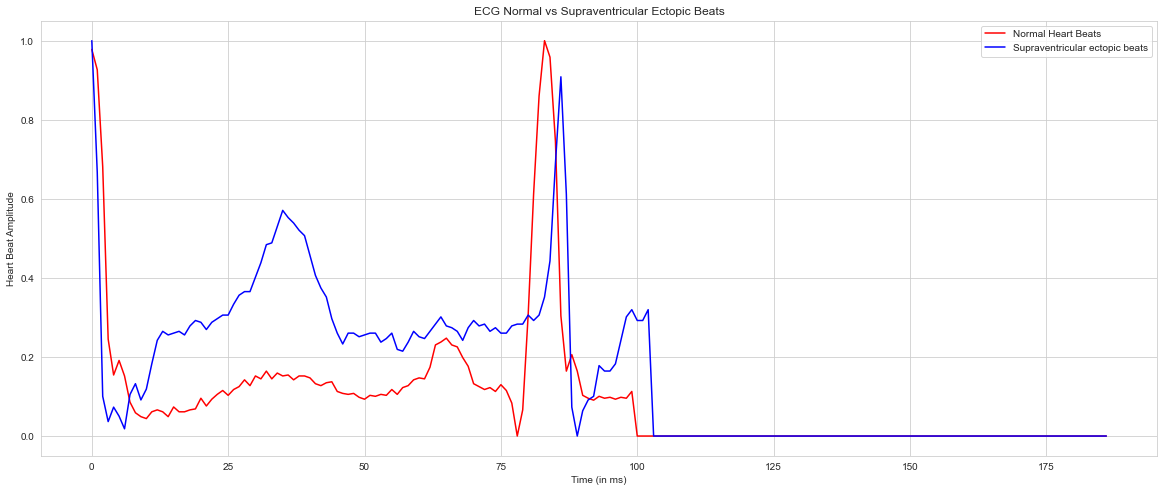

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(set_0.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(set_1.iloc[0, 0:187], color = 'blue', label = 'Supraventricular ectopic beats')
plt.title("ECG Normal vs Supraventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

In [18]:
from sklearn.utils import resample
set_0_downsample = train_data[train_data[187]==0].sample(n =15000, random_state=123)
set_1_upsample = resample(set_1, n_samples = 15000, replace = True, random_state = 123)
set_2_upsample = resample(set_2, n_samples = 15000, replace = True, random_state = 123)
set_3_upsample = resample(set_3, n_samples = 15000, replace = True, random_state = 123)
set_4_upsample = resample(set_4, n_samples = 15000, replace = True, random_state = 123)

In [19]:
train_df = pd.concat([set_0_downsample, set_1_upsample, set_2_upsample, set_3_upsample, set_4_upsample])


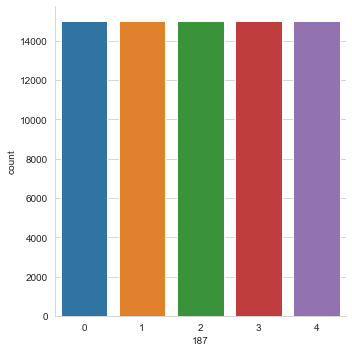

In [20]:
sns.catplot(x = 187, kind = 'count', data = train_df)
